In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df = pd.read_csv("/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv")

In [3]:
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7689,7690,15777452,Sauve,587,France,Female,46,6,88820.29,1,0,0,70224.34,0
4650,4651,15664214,Hearn,670,France,Male,33,2,141204.65,2,1,0,76257.46,0
9377,9378,15709447,Reed,584,France,Female,26,0,146286.22,1,1,0,105105.35,0
7214,7215,15652658,Finch,721,France,Male,36,1,155176.83,2,1,1,49653.37,0
9564,9565,15720083,Fiorentino,554,Spain,Male,42,1,0.00,2,0,1,183492.90,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
print(f"Duplicated Value found: {df.duplicated().sum()}")

Duplicated Value found: 0


In [6]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df.drop(columns = ["RowNumber", "CustomerId", "Surname"],inplace=True)

In [8]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2655,850,Germany,Male,53,2,94078.97,2,1,0,36980.54,0
1467,624,Germany,Female,35,0,180303.24,2,1,0,163587.90,0
2557,837,France,Male,26,4,89900.24,2,1,0,175477.03,0
7648,610,Spain,Female,31,5,0.00,2,0,0,63736.36,0
3910,620,France,Female,70,3,87926.24,2,1,0,33350.26,1


In [9]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True, dtype=int)

In [10]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
5130,691,38,9,163965.69,2,0,1,103511.26,0,1,0,1
9990,714,33,3,35016.60,1,1,0,53667.08,0,1,0,1
3803,850,51,4,124425.99,1,0,0,118545.49,1,1,0,1
2438,628,61,1,97361.66,1,1,1,149922.38,1,1,0,0
4658,700,28,8,159900.38,1,0,0,22698.56,0,0,1,1


In [11]:
#split the dataset into training and testing set

X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

print("Dataset split into training and testing set")

Dataset split into training and testing set


In [12]:
#transform the X values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

X_train_trf
X_test_trf

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [13]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

2025-08-04 06:38:48.015398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754289528.248075      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754289528.317659      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
#building model architecture

model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-08-04 06:39:03.017815: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 229 (916.00 B)

 Trainable params: 229 (916.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model_history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7856 - loss: 0.5477 - val_accuracy: 0.7969 - val_loss: 0.5073
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7918 - loss: 0.5106 - val_accuracy: 0.7969 - val_loss: 0.4996
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8038 - loss: 0.4895 - val_accuracy: 0.7969 - val_loss: 0.4934
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7969 - loss: 0.4914 - val_accuracy: 0.7969 - val_loss: 0.4842
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7937 - loss: 0.4845 - val_accuracy: 0.7969 - val_loss: 0.4723
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7939 - loss: 0.4705 - val_accuracy: 0.7969 - val_loss: 0.4597
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4529 - val_accuracy: 0.7969 - val_loss: 0.4487
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8007 - loss: 0.4389 - val_accu

In [18]:
model.layers[0].get_weights()

[array([[-2.92002439e-01,  2.34207317e-01, -2.27516919e-01,
          4.00668532e-01,  6.39911965e-02, -4.76283953e-02,
          3.07009388e-02, -1.76943719e-01, -1.18143126e-01,
         -7.26274699e-02, -8.39990079e-02],
        [ 5.52720502e-02, -1.50980330e+00, -2.60995865e-01,
          9.83466506e-02,  8.75353336e-01,  1.53424132e+00,
          5.10036170e-01,  1.41739696e-01,  9.19408679e-01,
         -3.83565933e-01,  1.15174305e+00],
        [-8.16024616e-02, -1.48952395e-01,  2.44711921e-01,
          3.36198390e-01,  1.28023084e-02, -3.50680143e-01,
         -1.81439444e-02, -3.60116094e-01,  6.92515597e-02,
         -1.02592595e-01,  2.11844102e-01],
        [-8.66161942e-01, -1.68391794e-01, -7.79270053e-01,
         -1.34480500e+00, -9.82028693e-02,  1.74409121e-01,
          1.63104391e+00, -4.17064905e-01,  4.00179714e-01,
         -7.86484480e-01, -1.34223014e-01],
        [-8.19757819e-01, -7.18538046e-01, -4.60571796e-01,
         -8.51207137e-01,  3.31403685e+00,  

In [19]:
model.layers[1].get_weights()

[array([[-0.27429068, -0.8519223 ,  0.5240091 ,  0.01261557,  0.8745606 ,
          0.6990312 ],
        [-0.7635556 ,  0.09378074,  0.6973339 ,  0.83940226,  0.5026595 ,
          1.0279089 ],
        [-0.06375228, -0.4460137 , -0.05988098,  0.42564547,  0.08553302,
          0.15700412],
        [-0.693215  , -0.7502064 ,  0.19199103,  0.54761565,  0.42573974,
          0.6805665 ],
        [-0.28521284, -0.23030664,  0.8967961 ,  0.97097945,  0.6757808 ,
          0.7605935 ],
        [ 1.1060741 ,  1.1885787 , -1.4737886 , -1.2276696 , -1.3312993 ,
         -1.1480402 ],
        [-0.9148294 , -0.73797315,  0.9833023 ,  0.33577326,  0.23781791,
          0.00919677],
        [-1.097918  , -0.372035  ,  0.26164496,  1.1436777 ,  1.1484036 ,
          0.94546753],
        [-1.3139093 , -1.7269074 ,  1.6264678 ,  0.75075376,  1.399859  ,
          1.4285231 ],
        [ 1.1033868 ,  1.2284963 , -0.91902906, -0.85256463, -0.88067853,
         -1.0601556 ],
        [ 0.78799194,  1.36784

In [20]:
model.layers[2].get_weights()

[array([[ 1.727245  , -2.412121  , -2.2255318 ],
        [ 2.3145542 , -2.2906656 , -2.1484556 ],
        [-1.6880139 ,  1.515875  ,  0.29928994],
        [-0.24978296,  1.3876636 ,  1.2916679 ],
        [-1.2501346 ,  0.33823097,  1.6480283 ],
        [-1.3501036 ,  1.2694403 ,  1.2651677 ]], dtype=float32),
 array([ 0.61853486, -0.23101595, -0.3771284 ], dtype=float32)]

In [21]:
y_pred = model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
y_pred_final = np.where(y_pred>0.5, 1, 0)

In [23]:
y_pred_final

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [24]:
from sklearn.metrics import accuracy_score
print(f"Accuracy Score: {accuracy_score(y_test,y_pred_final)}")

Accuracy Score: 0.861


In [25]:
model_history.history

{'accuracy': [0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7957812547683716,
  0.7985937595367432,
  0.8096874952316284,
  0.8135937452316284,
  0.8168749809265137,
  0.8199999928474426,
  0.8203125,
  0.821093738079071,
  0.8221874833106995,
  0.8239062428474426,
  0.8256250023841858,
  0.828125,
  0.8296874761581421,
  0.8343750238418579,
  0.8314062356948853,
  0.8337500095367432,
  0.8357812762260437,
  0.8373437523841858,
  0.8382812738418579,
  0.8387500047683716,
  0.8396875262260437,
  0.8407812714576721,
  0.8410937786102295,
  0.8431249856948853,
  0.84375,
  0.8450000286102295,
  0.8453124761581421,
  0.8460937738418579,
  0.8495312333106995,
  0.8504687547683716,
  0.8501562476158142,
  0.850781261920929,
  0.8510937690734863,
  0.8517187237739563,
  0.8553125262260437,
  0.8542187213897705,
  0.8565624952316284,
  0.856249988079071,
  0.85796

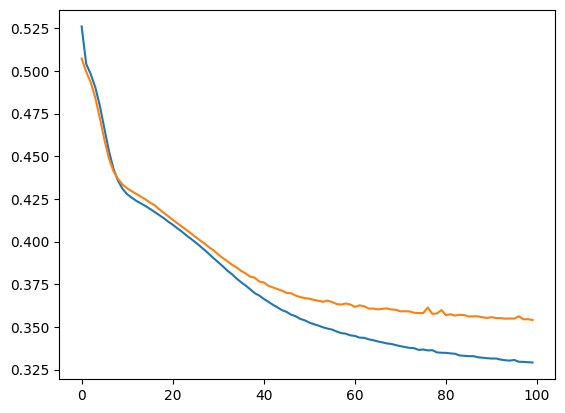

In [26]:
import matplotlib.pyplot as plt

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])

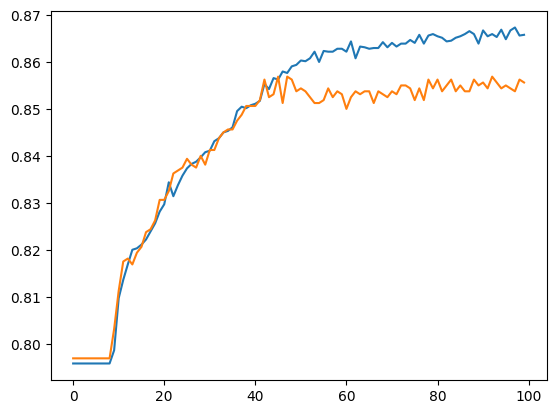

In [27]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])